In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Normalization and standardization: stretching and shrinking

How do we transform an ellipse into a circle? And why might we want to?

Let's play around with two 1-D Gaussians, with the same mean but different variances. We draw 10000 samples and plot the distributions on top of one another in a histogram and also overlay a smoothed density plot.

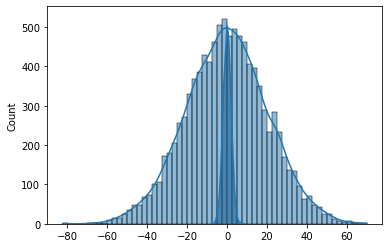

In [70]:
mean_x = 0
sd_large = 20
sd_small = sd_large / 10
n_x = 10000

x_large_var = np.random.normal(
    loc = mean_x, # mean
    scale = sd_large,   # SD
    size = n_x)

x_small_var = np.random.normal(
    loc = mean_x, # mean
    scale = sd_small,   # SD
    size = n_x)

plot_large_var = sns.histplot(x_large_var, kde=True)
plot_small_var = sns.histplot(x_small_var, kde=True)


Now let's look at these vectors in a scatterplot. Describe the shape of the distribution. Why don't we have a circle?

(-8.532899537775275, 8.402231922090252, -92.71688298216486, 77.38037951398972)

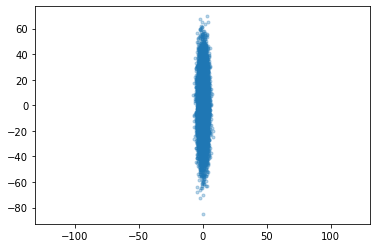

In [4]:
plt.scatter(x_small_var, x_large_var, marker = '.', alpha =0.3)
plt.axis('equal') # why do we need this? 
# See https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_equal_demo.html

We can transform our distribution into a circle by standardizing our variables! We want to stretch the short side and shrink the long side. Let's first look at one variable at once.

- Stretch `x_small_var`  (how do we do this?)
- Shrink `x_large_var`   (how do we do this?)


(-4.266449768887638, 4.201115961045126, -4.635844149108243, 3.869018975699486)

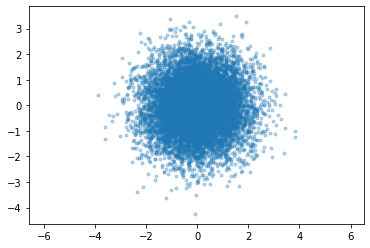

In [5]:
std_x_small_var = x_small_var * 1/sd_small
std_x_large_var = x_large_var * 1/sd_large

plt.scatter(std_x_small_var, std_x_large_var, marker = '.', alpha =0.3)
plt.axis('equal')

In [6]:
print('SD of x_small_var:', np.std(x_small_var))
print('SD of scaled x_small_var:', np.std(std_x_small_var))
print('SD of x_large_var:', np.std(x_large_var))
print('SD of scaled x_large_var:', np.std(std_x_large_var))

SD of x_small_var: 1.9846953153290625
SD of scaled x_small_var: 0.9923476576645313
SD of x_large_var: 20.02937764011223
SD of scaled x_large_var: 1.0014688820056115


We were independently stretching and shrinking each variable. But we can also do the stretching/strinking in one matrix multiplication operation with a 2x2 matrix, ${\bf D^{-1}}$ (What is ${\bf D}$?) 

$$ {\bf D}^{-1} = 
\begin{bmatrix}
1/s_1 & 0 \\
0 & 1/s_2\\
\end{bmatrix}
$$

In [7]:
D_inv = np.array([ [1/sd_small, 0], [0, 1/sd_large] ])
print(D_inv)


[[0.5  0.  ]
 [0.   0.05]]


$$ \mathbf{X}_s = \mathbf{X}\mathbf{D}^{-1} $$

where $ \mathbf{X}_s $ is the standardized (transformed) version of $ {\bf X} $ and


$$ {\bf X} = 
\begin{bmatrix}
{\bf x}_{small.var} & {\bf x}_{large.var} \\
\end{bmatrix}
$$

In [8]:
X = np.column_stack((x_small_var, x_large_var))

print('Dimensions of X:', X.shape)
print('X looks like this:', X)


X_s = X @ D_inv   # that's shorthand for matrix multiplication in python

#X_s = D_inv @ X   # can we do it this way? what do you think?

print('Dimensions of X_s:', X_s.shape)
print('X_s looks like this:', X_s)

Dimensions of X: (10000, 2)
X looks like this: [[ -3.01982263  24.09973798]
 [ -1.48331226  48.15568405]
 [ -0.0933328    4.26962551]
 ...
 [  0.25767404  -6.18573863]
 [  1.68365009   0.92357572]
 [  0.36601305 -23.99229152]]
Dimensions of X_s: (10000, 2)
X_s looks like this: [[-1.50991131  1.2049869 ]
 [-0.74165613  2.4077842 ]
 [-0.0466664   0.21348128]
 ...
 [ 0.12883702 -0.30928693]
 [ 0.84182505  0.04617879]
 [ 0.18300653 -1.19961458]]


And we can now use a scatterplot to plot our transformed ${\bf X}$, the standardized ${\bf X}_s$

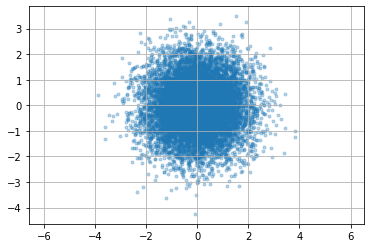

In [9]:
plt.scatter(X_s[:,0], X_s[:,1], marker = '.', alpha =0.3)
plt.axis('equal')
plt.grid()

If our two variables had different means, we could have also first shifted them to the origin. If we did that we'd have the full z-score treatment. Here we already started out with means at the origin, so shifting to origin did not have any discernable effect.

Why are we multiplying on the right? This looks different from the linear transforms we've been studying from 3Blue1Brown, right?

$$ \mathbf{X}_s = \mathbf{X}\mathbf{D}^{-1} $$

Could we multiply ${\bf X}$ on the left somehow or something similar?

No? It looks like we could also get

$$ \mathbf{X} = \mathbf{X}_s\mathbf{D} $$

or

$$ \mathbf{D}\mathbf{X}_s = \mathbf{D}\mathbf{X}\mathbf{D}^{-1} $$



## Covariance and distribution shape
Once we move from 1-D to 2-D and higher dimensions, then another aspect of the distribution shape beyond the center (e.g., mean) and spread (e.g., measured as variance or standard deviation).  Let's do a bunch of samples again. How does the shape of the distribution change as we take one random sample (drawn independently from two 1-D Gaussians) after the other? What if we change some of the parameters values?

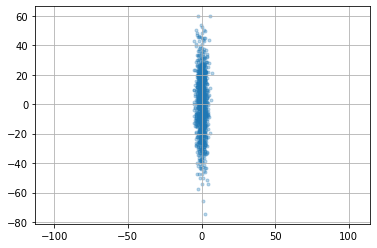

In [71]:
mean_x = 0
sd_large = 20
sd_small = sd_large / 10
n_x = 1000

x_large_var = np.random.normal(
    loc = mean_x, # mean
    scale = sd_large,   # SD
    size = n_x)

x_small_var = np.random.normal(
    loc = mean_x, # mean
    scale = sd_small,   # SD
    size = n_x)

plt.scatter(x_small_var, x_large_var, marker = '.', alpha =0.3)
plt.axis('equal')
plt.grid()

We can also sample from a 2-D Gaussian using [NumPy's random.multivariate_normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html). If we look at the documentation for that, the first thing it says is:

```text
random.multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)

Draw random samples from a multivariate normal distribution.

The multivariate normal, multinormal or Gaussian distribution is a generalization of the one-dimensional normal distribution to higher dimensions. Such a distribution is specified by its mean and covariance matrix. These parameters are analogous to the mean (average or “center”) and variance (standard deviation, or “width,” squared) of the one-dimensional normal distribution.

```

Following the examples at the bottom of the documentation, first we can define the parameters to sample from a 2-D Gaussian and then draw the sample.

In [77]:
mean_norm = [0,0]
#cov_norm = np.array([[6, -3], [-3, 3.5]])
cov_norm = np.array([[4, 0], [0, 4]])


pts_norm = np.random.multivariate_normal(mean_norm, cov_norm, size=10000)

Let's plot it!

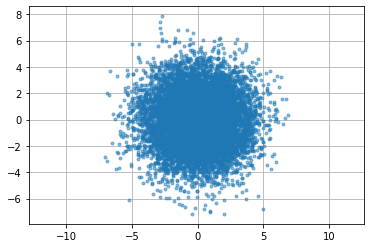

In [78]:
plt.plot(pts_norm[:, 0], pts_norm[:, 1], '.', alpha=0.5)
plt.axis('equal')
plt.grid()

We can check that the actual sample mean and covariance is close to what we defined:

In [79]:
print('Sample mean:', pts_norm.mean(axis=0))
print('Sample covariance:', np.cov(pts_norm.T))
print('Sample correlation:', np.corrcoef(pts_norm.T)[0,1])

Sample mean: [-0.01240841 -0.00588749]
Sample covariance: [[ 4.00843916 -0.02299155]
 [-0.02299155  3.95162673]]
Sample correlation: -0.005776871829969494


What is covariance? What is correlation? Let's do some visualization.

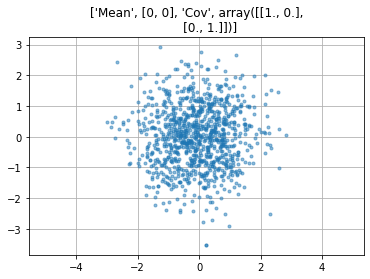

In [14]:
def plot_gauss_2d(mean_norm = [0,0], cov_norm = np.eye(2), size = 1000):
    pts_norm = np.random.multivariate_normal(mean_norm, cov_norm, size)
    #print('mean: ', mean_norm)
    #print('cov: ', cov_norm)
    plt.plot(pts_norm[:, 0], pts_norm[:, 1], '.', alpha=0.5)
    plt.axis('equal')
    plt.grid()
    plt.title(['Mean', mean_norm, 'Cov', cov_norm])
    
plot_gauss_2d()

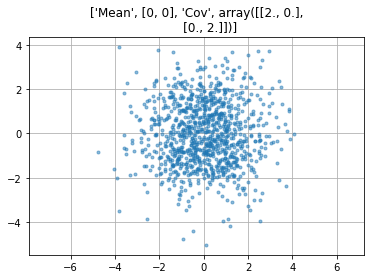

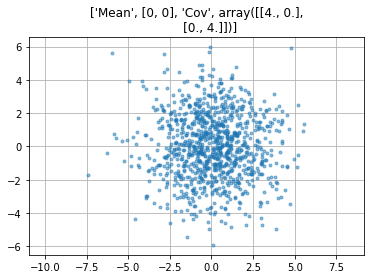

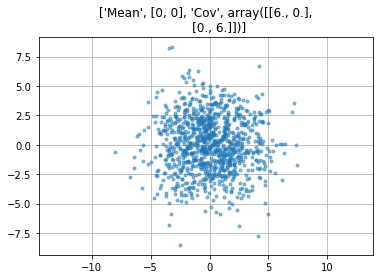

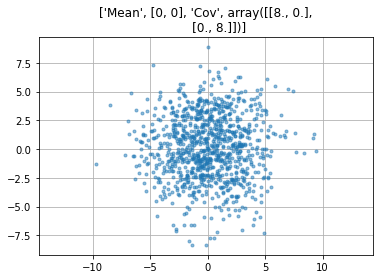

In [15]:
# Let's stretch and shrink an identity matrix for covariance: what happens?

for i in range(1,5):
    plt.figure()
    plot_gauss_2d(cov_norm = 2*i * np.eye(2))

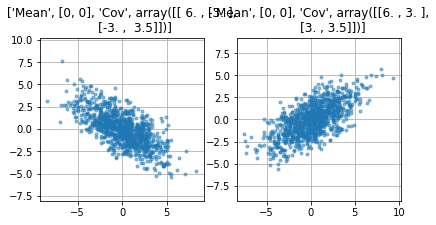

In [20]:
# Direction/orientation of distribution?

cov_norm1 = np.array([[6, -3], [-3, 3.5]])
cov_norm2 = np.array([[6, 3], [3, 3.5]])

fig = plt.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes1 = plot_gauss_2d(cov_norm = cov_norm1)

axes2 = fig.add_subplot(1, 3, 2)
axes2 = plot_gauss_2d(cov_norm = cov_norm2)


See example figures from [cookie robotics](https://cookierobotics.com/007/) reproduced below.

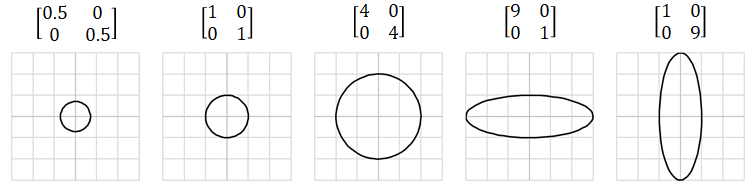)
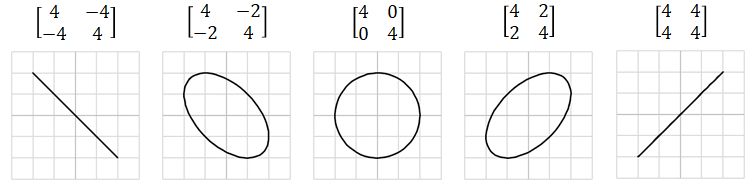

What can you tell about the correlation of each samples based on its covariance matrices? Why did we get a line in some cases?

So now if we go back to thinking about our z-score and standardization transformation, what we are doing is transforming the covariance to an identity matrix (and shifting to the origin), i.e., we are transforming our original distribution to a [standard normal distribution](https://mathworld.wolfram.com/StandardNormalDistribution.html). What was the "change in graph paper"? Or Jennifer's viewpoint?

In [ ]:
print('Sample mean:', X_s.mean(axis=0))
print('Sample covariance:', np.cov(X_s.T))
print('Sample correlation:', np.corrcoef(X_s.T)[0,1])

We can also extend our geometric interpretation to thinking about the covariance matrix. Let's take a look at [Vision Dummy's nice explanation](https://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/) (but be aware it looks like there may be some mistakes in there---the general idea is on the right track though!, see also [accompanying code](https://datascienceplus.com/understanding-the-covariance-matrix/)).  The key additional ingredient is the rotation: in z-scores, we shift horizontally/vertically (adding) and scale (multiplying).  But what about rotation?

Let's see how we can transform a sample covariance matrix for a 2-D Gaussian that is not the standard one (identity matrix) into the standard one.  Following the [accompanying code for Vision Dummy's post](https://datascienceplus.com/understanding-the-covariance-matrix/))...

First we start out with our standard normal.

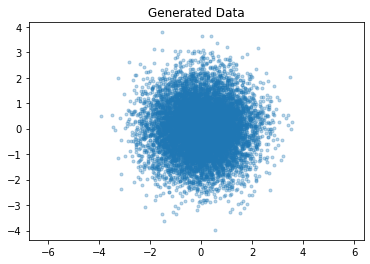

In [80]:
# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.random.normal(0, 1, 10000)
y = np.random.normal(0, 1, 10000)
X = np.vstack((x, y)).T

plt.scatter(X[:, 0], X[:, 1], alpha = 0.3, marker = '.')
plt.title('Generated Data')
plt.axis('equal');


We can also define a covariance computation from scratch, based on the definition:

$$Cov(x,y) = \frac{\displaystyle\sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})}{n-1}$$

where $\langle x_i, y_i \rangle$ is the $i$th observation,  $n$ is the number of observations and $\bar{x}$ and $\bar{y}$ are the sample means

and check that the covariance matrix of our generated sample indeed is the identity matrix.


In [81]:
# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], [cov(X[1], X[0]), cov(X[1], X[1])]])

# Calculate covariance matrix 
cov_mat(X.T) # (or with np.cov(X.T))

array([[ 1.01164535e+00, -3.15746888e-04],
       [-3.15746888e-04,  9.78236513e-01]])

Remember our scaling matrix $\bf{D}^{-1}$? We can re-define a matrix like that here (the post calls that "Scale" or $\mathbf{S}$)


$$ {\bf Scale} = 
\begin{bmatrix}
s_1 & 0 \\
0 & s_2\\
\end{bmatrix}
$$


as well as a rotation matrix:

$$ {\bf R} = 
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)\\
\end{bmatrix}
$$

We start with just scaling (like before):



array([[ 4.95706219e-01, -7.51477595e-04],
       [-7.51477595e-04,  1.13084141e+01]])

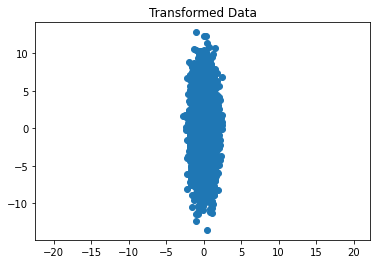

In [82]:
# Center the matrix at the origin
X = X - np.mean(X, 0)

# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Apply scaling matrix to X
Y = X.dot(Scale)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal')

# Calculate covariance matrix
cov_mat(Y.T)

array([[ 5.22520989, -5.3638174 ],
       [-5.3638174 ,  6.57891042]])

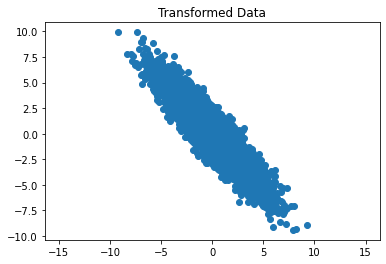

In [83]:
# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Rotation matrix
theta = 0.77*np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

# Transformation matrix
T = Scale @ Rot

# Apply transformation matrix to X  (note we have transformation matrix on right again)
Y = X @ T

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal');

# Calculate covariance matrix
cov_mat(Y.T)


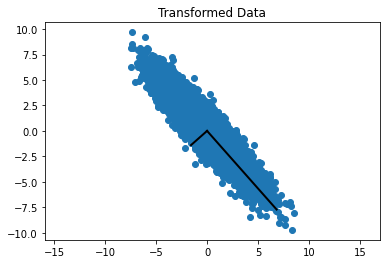

In [68]:
C = cov_mat(Y.T)
eVe, eVa = np.linalg.eig(C)

plt.scatter(Y[:, 0], Y[:, 1])
for e, v in zip(eVe, eVa.T):
    plt.plot([0, 3*np.sqrt(e)*v[0]], [0, 3*np.sqrt(e)*v[1]], 'k-', lw=2)
plt.title('Transformed Data')
plt.axis('equal');

First we can rotate it to be axis-aligned.

array([[1.00000000e+00, 4.96719044e-16],
       [4.96719044e-16, 1.00000000e+00]])

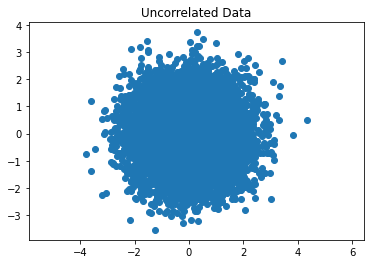

In [69]:
C = cov_mat(Y.T)

# Calculate eigenvalues
eVa, eVe = np.linalg.eig(C)

# Calculate transformation matrix from eigen decomposition
R, S = eVe, np.diag(np.sqrt(eVa))
T = R.dot(S).T

# Transform data with inverse transformation matrix T^-1
Z = Y.dot(np.linalg.inv(T))

plt.scatter(Z[:, 0], Z[:, 1])
plt.title('Uncorrelated Data')
plt.axis('equal');

# Covariance matrix of the uncorrelated data
cov_mat(Z.T)

## PCA, LDA and Mahalanobis distance

Remember we talked about two general approaches to learning: discriminative and generative. The discriminative approach doesn't try to learn, say, the actual vowel category distribution, but rather, the optimal separating line (or more generally, separating hyperplane) between two categories. This is how linear discriminant analysis (LDA).  First, let's connect LDA to the geometric approach we have been taking. We can do this via the Mahalanobis distance (see Lattin et al., 2003, *Analyzing Multivariate Data*, Chapter 12, which I take this material from).

How do we decide what the optimal separating line is? Mahalanobis said: let's find the locus of points equidistant from the two class/category means.  Now we need to ask: what kind of distance? A **covariance-adjusted** distance, that uses the within-class covariance matrix, ${\bf C}_w$.  We define this distance, called the Mahalanobis distance, say, of some point $x$ from the class mean for vowel category /a/, ${\bf \bar{x}}_a$, as $D_a$ where:

$$ D_a^2 = ({\bf x} - {\bf \bar{x}}_a)^T {\bf C}_w^{-1} ({\bf x} - {\bf \bar{x}}_a)$$

Similarly, the Mahalanobis distance of some point $x$ from the class mean for vowel category /i/ is:

$$ D_i^2 = ({\bf x} - {\bf \bar{x}}_i)^T {\bf C}_w^{-1} ({\bf x} - {\bf \bar{x}}_i)$$

To find the locus of points equidistant from the two class means, we set our two distances equal, $ D_a^2 = D_i^2 $, and solve for ${\bf x}$.

We can think of computing with this new distance as a transformation...

Similarly, for Principal Components Analysis (PCA), we are making a rotation to a coordinate system where are basis vectors are the eigenvectors for the distribution.

There is a [nice explanation of the Mahalanobis distance on Stack Overflow by whuber](https://stats.stackexchange.com/a/62147), let's take a look!
